# 星系的恒星形成历史 使用 AnastrisTNG 和 GalaxyPose

这个ipynb 简单展示 使用 AnastrisTNG 和 GalaxyPose 计算和绘制星系的恒星形成历史 (空间和时间)
这里仅仅展示一个对TNG中星系的粗略的示例，
更加精确详细的示例或者分析其他模拟数据，参考 https://github.com/GalaxySimAnalytics/GalaxyPose

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from AnastrisTNG import TNGsimulation

In [2]:
path = '/home/yxi/Simulation/sims/TNG50-1/output'
snap = 99
snapshot = TNGsimulation.Snapshot(path,snap)
snapshot.load_particle_para['star_fields'] = ['GFM_StellarFormationTime','BirthPos','BirthVel','GFM_InitialMass',]

In [3]:
from galpos.anastristng_decorate import make_star_birth     # https://github.com/GalaxySimAnalytics/GalaxyPose

In [ ]:
ID = 10

In [5]:
birth_centered = make_star_birth(snapshot, ID)
birth_centered.align_with_galaxy(orientation_align = False)
birth_centered.physical_units()

birth_aligned = make_star_birth(snapshot, ID)
birth_aligned.align_with_galaxy(orientation_align = True)
birth_aligned.physical_units()

In [6]:
pos,vel,tran = birth_centered.final_state()

In [7]:
sub = snapshot.load_particle(ID)# physical units and center
sub.physical_units()
sub.check_boundary()
sub.shift(pos = pos,vel = vel)
sub.transform(tran)

<Transformation rotate>

In [8]:
from galpos.plot_tools import plot_sfr_evolution

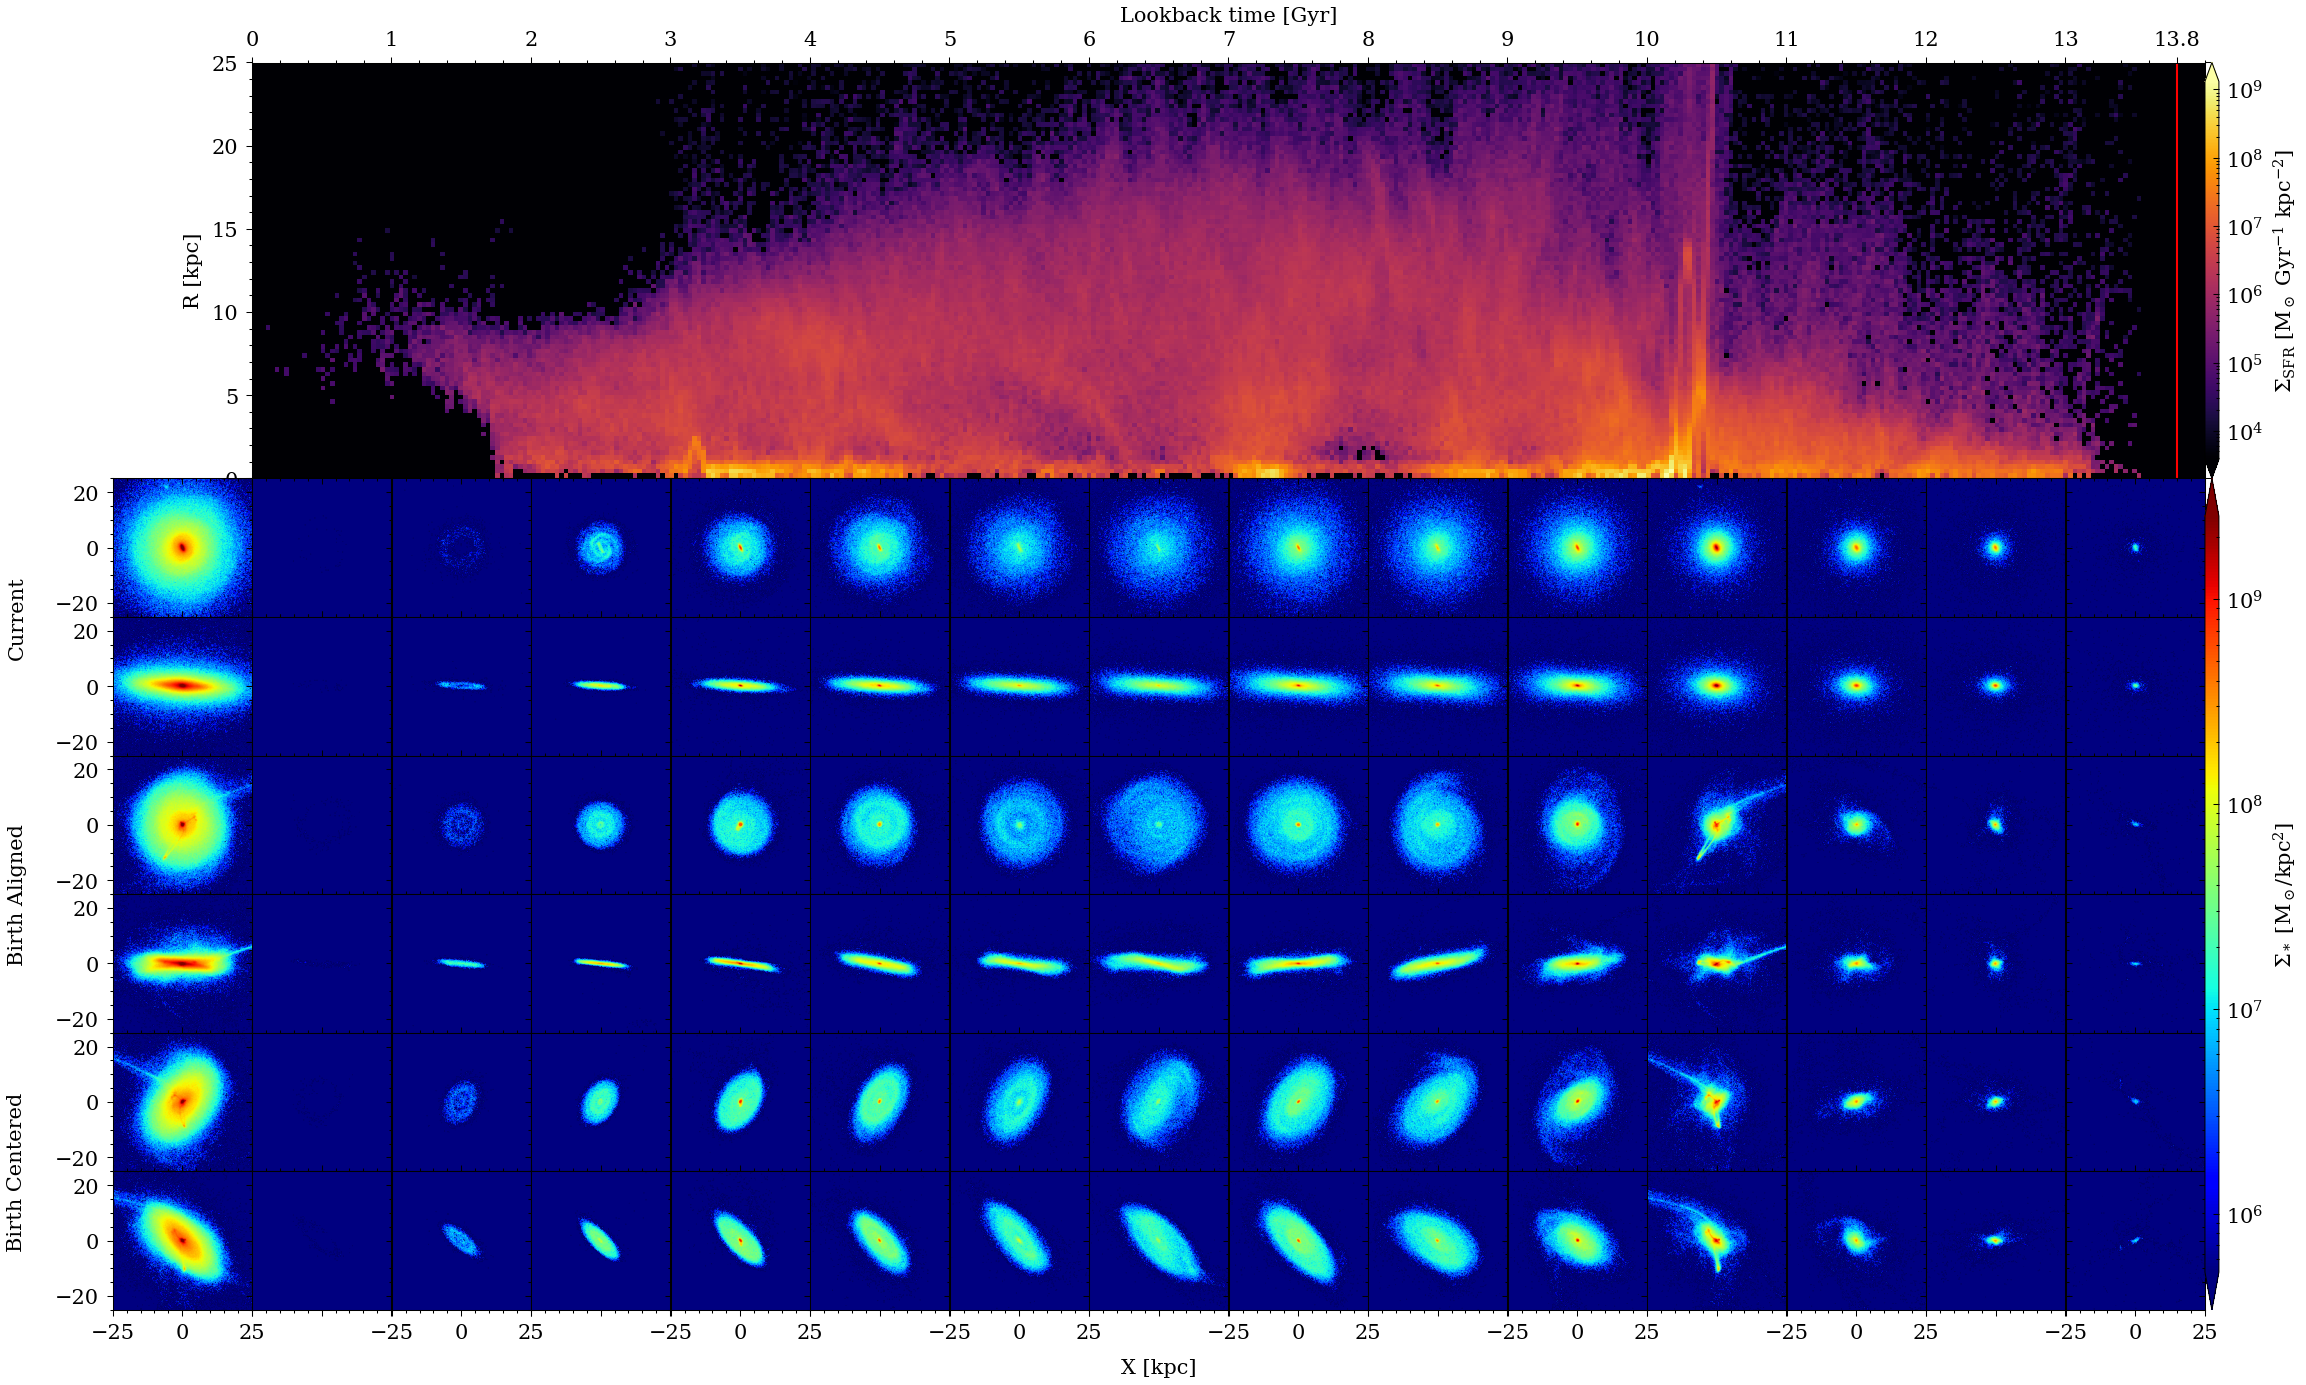

In [9]:
fig = plot_sfr_evolution(sub, birth_centered, birth_aligned)